British Airways Customer Prediction Model using Random Forest Classifer Model

The main objective of this project was to identify the key variables contributing to successful bookings and to build a predictive model with high accuracy.

Loading the dataset:

In [4]:
#Later only came to know that the encoding is not the default utf-8 rather it is cp1250
#Programming block to determine the encoding of the CSV file 
from charset_normalizer import from_path
encoding_of_the_file=from_path("D:\\Projects\\British Airways Customer Prediction\\customer_booking.csv").best() #best returns the first match
print(encoding_of_the_file.encoding)


cp1250


In [5]:
import pandas as pd
df=pd.read_csv("D:\\Projects\\British Airways Customer Prediction\\customer_booking.csv",encoding='cp1250')

In [6]:
#Loaading the dataset
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


Exploratory data analysis:


In [7]:
df.count().unique #Therefore, there is no duplicate rows
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

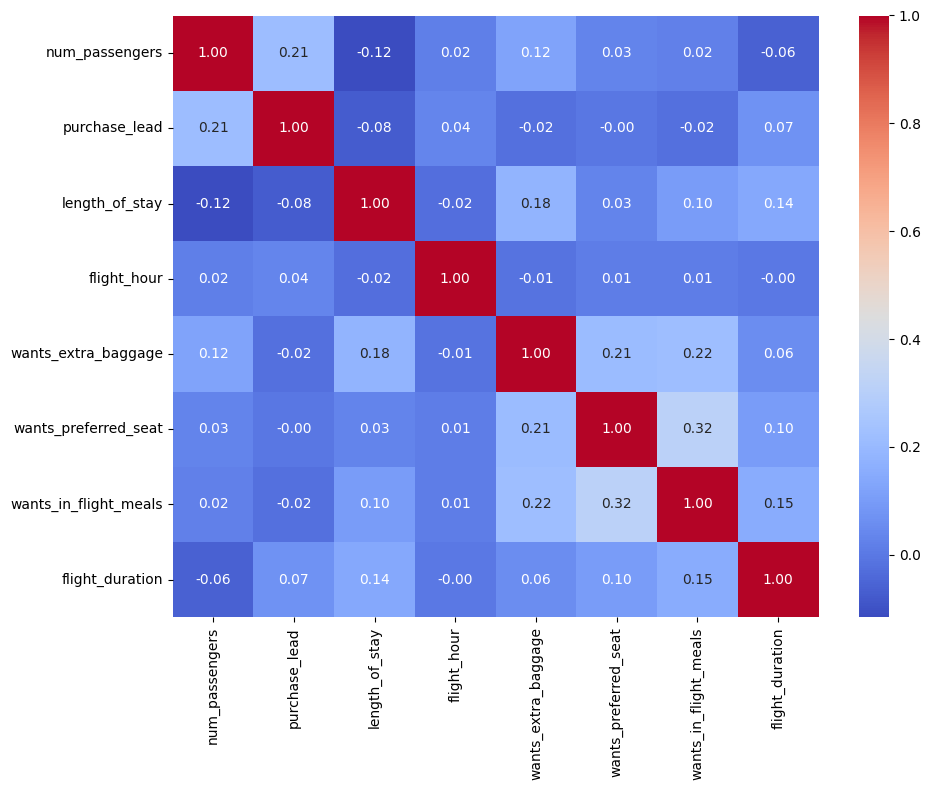

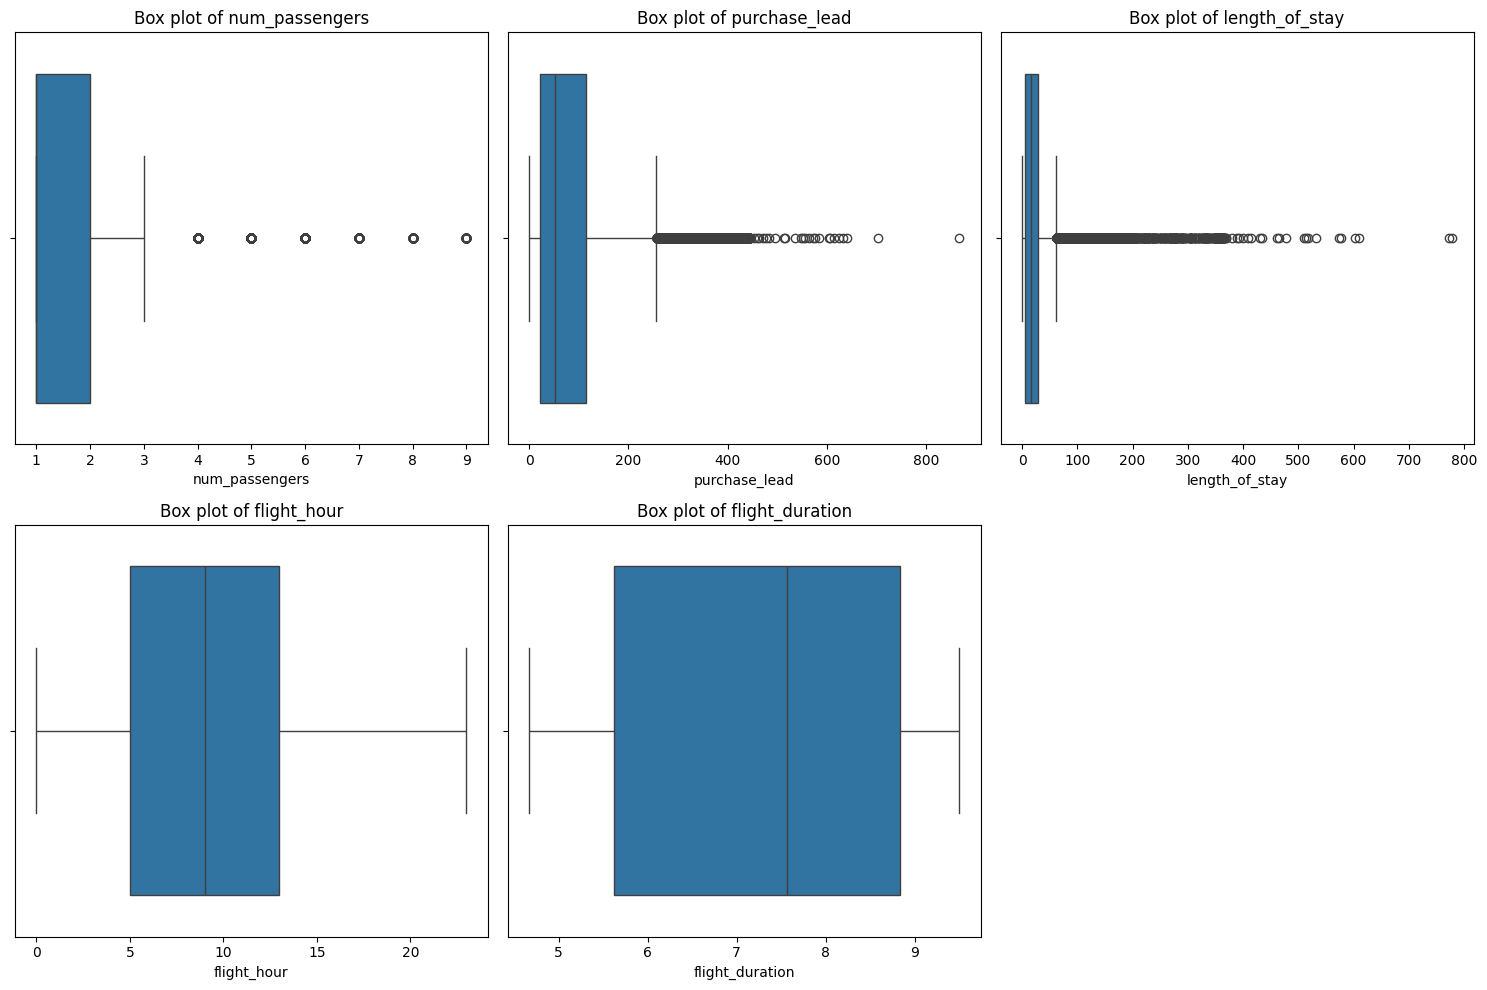

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap

features=df.drop(columns=['booking_complete'])
correlation_matrix=features.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap='coolwarm',fmt='.2f',annot=True)
plt.tight_layout()
plt.savefig("Correlation Heatmap.png")
plt.show() #Every features has a low correlation. So, I'm not going to remove any features

# Detecting Outlier
outlier_features=["num_passengers","purchase_lead","length_of_stay","flight_hour","flight_duration"]
plt.figure(figsize=(15,10))
for i,feature in enumerate(outlier_features,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[feature])
    plt.title(f"Box plot of {feature}")

plt.tight_layout()
plt.savefig("Box Plot.png")
plt.show()

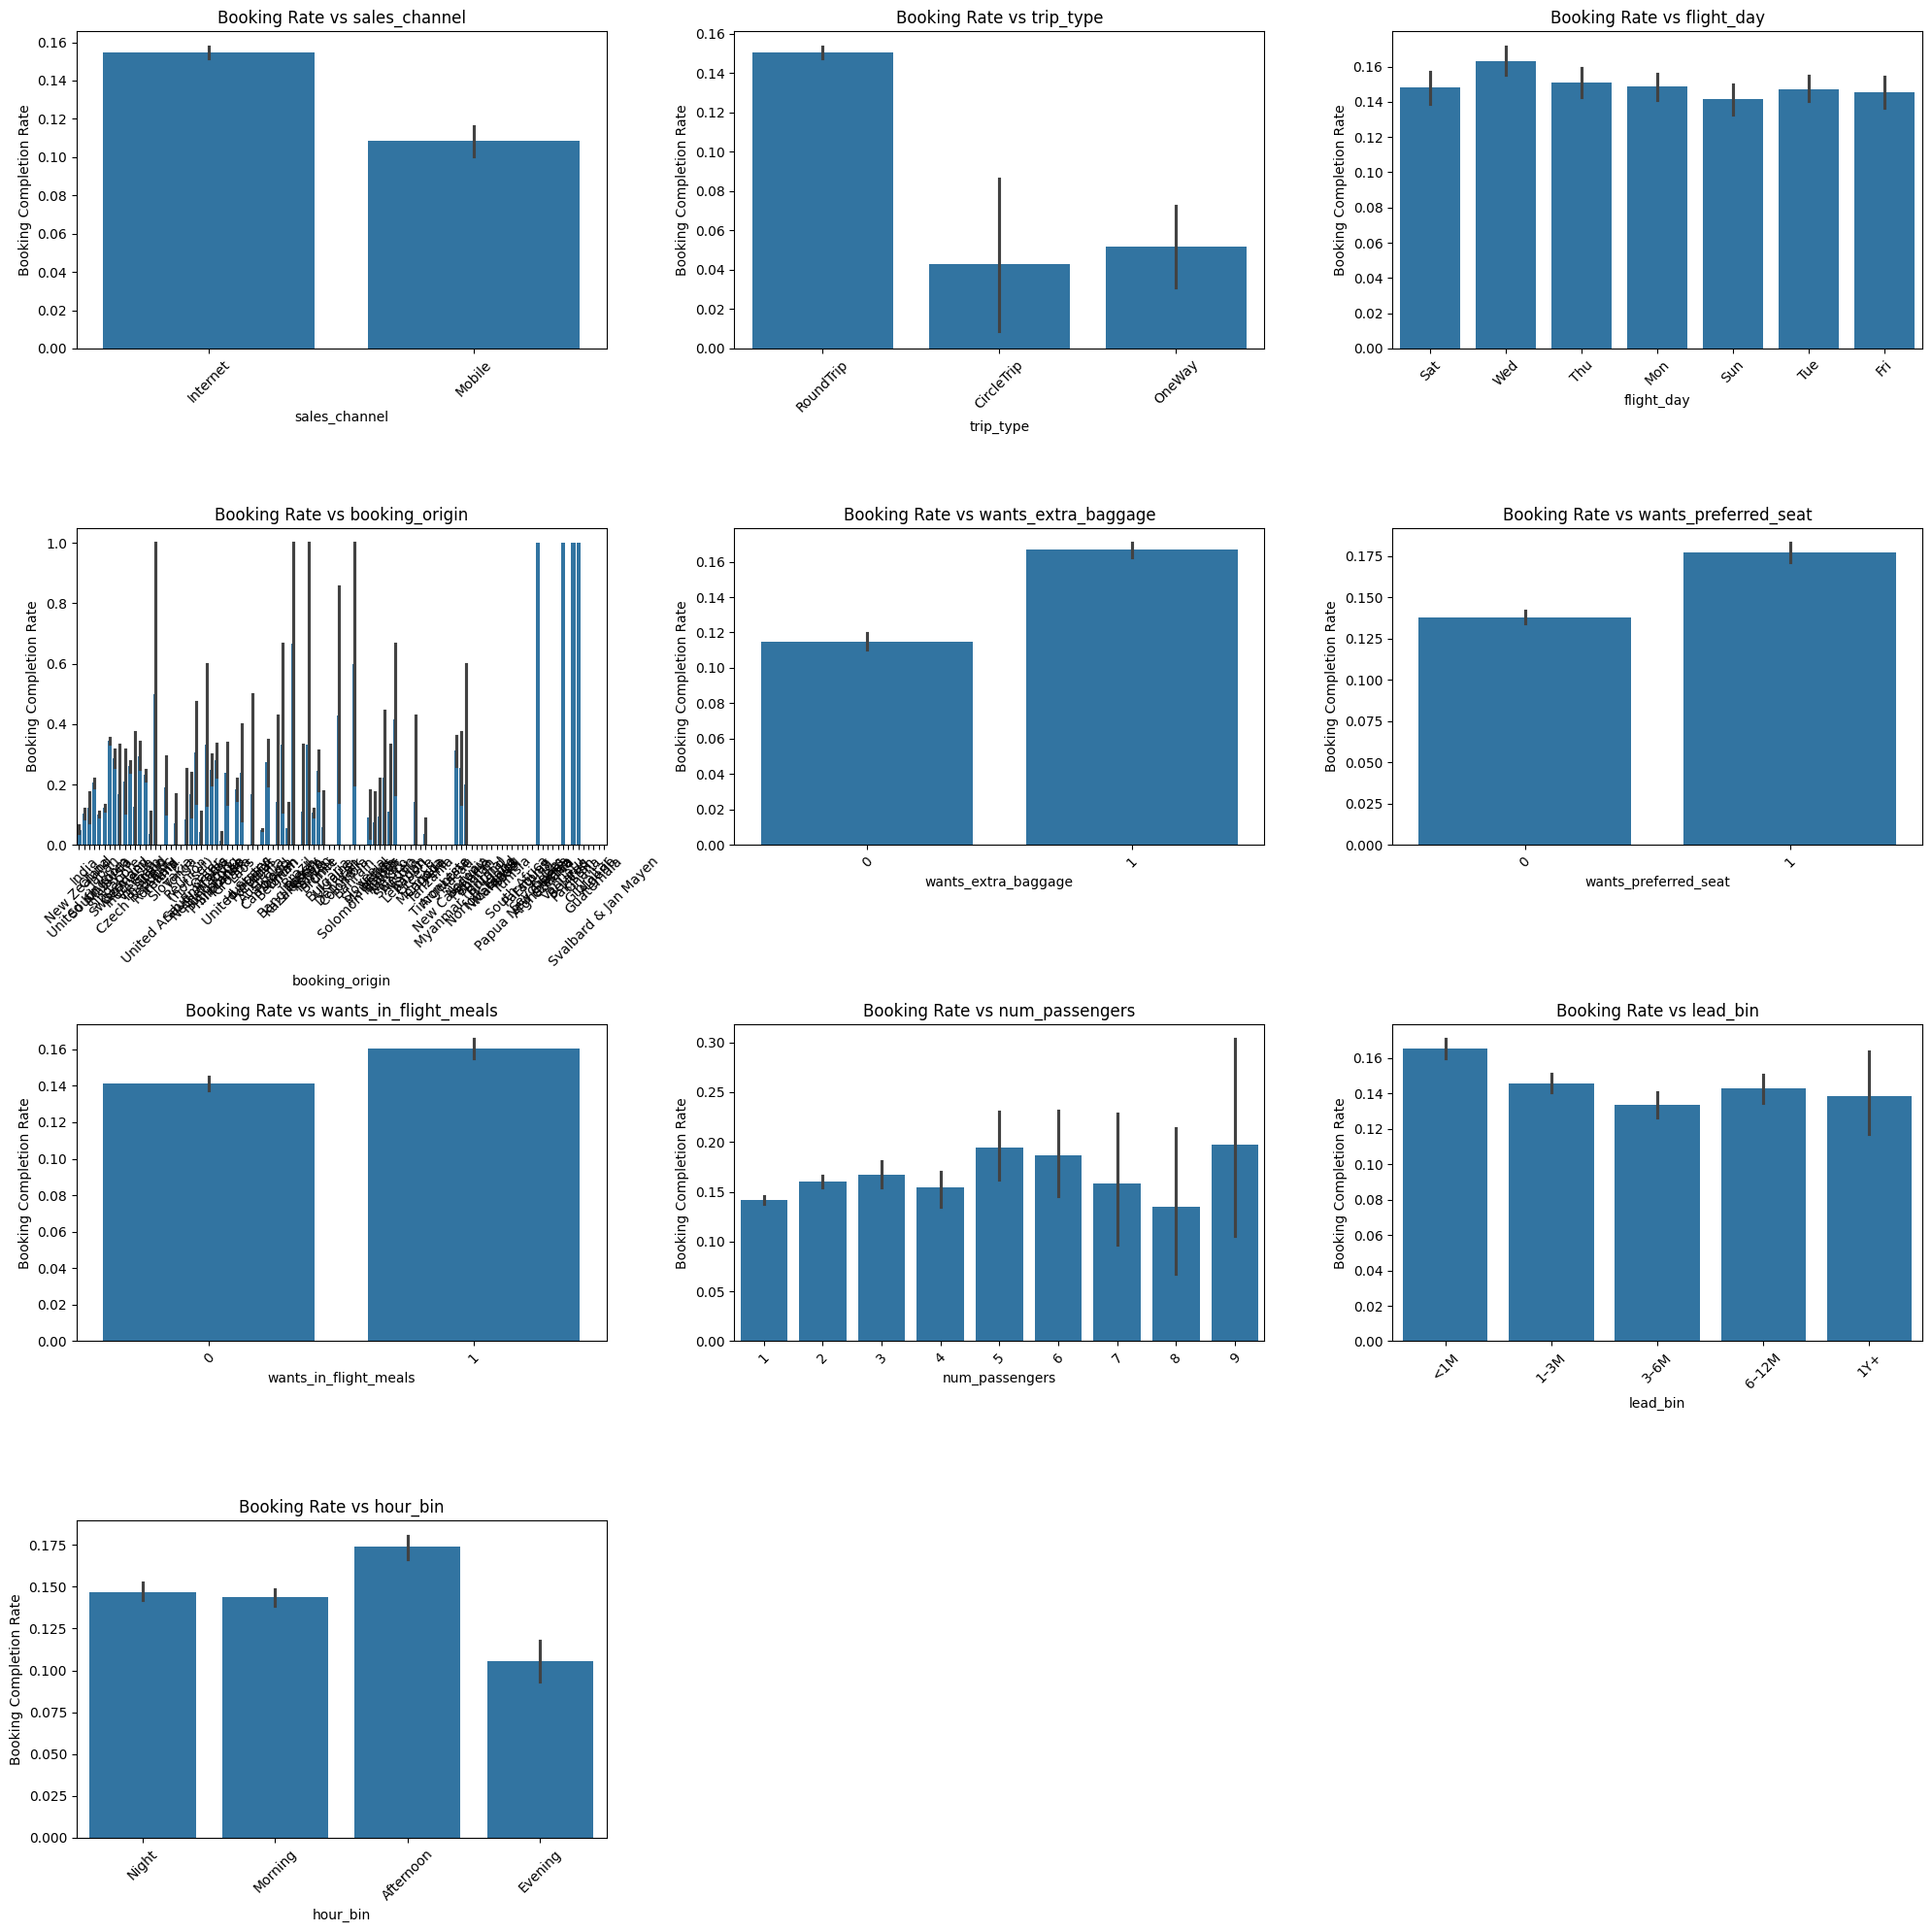

In [9]:


# Bin-ing continuous features for better bar plots
df['lead_bin'] = pd.cut(df['purchase_lead'], bins=[0, 30, 90, 180, 365, 1000], 
                        labels=['<1M', '1–3M', '3–6M', '6–12M', '1Y+'])

df['hour_bin'] = pd.cut(df['flight_hour'], bins=[-1, 6, 12, 18, 24], 
                        labels=['Night', 'Morning', 'Afternoon', 'Evening'])


features = [
    'sales_channel', 'trip_type', 'flight_day', 'booking_origin',
    'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
    'num_passengers', 'lead_bin', 'hour_bin'
]


plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.barplot(data=df, x=feature, y='booking_complete', estimator='mean')
    plt.xticks(rotation=45)
    plt.title(f'Booking Rate vs {feature}')
    plt.ylabel("Booking Completion Rate")
    plt.xlabel(feature)

plt.tight_layout()
plt.savefig('Bar chart.png')
plt.show()

In [10]:
data_encoded = pd.get_dummies(df, columns=['trip_type', 'lead_bin', 'hour_bin'], drop_first=True)
X = data_encoded
print(X)

       num_passengers sales_channel  purchase_lead  length_of_stay  \
0                   2      Internet            262              19   
1                   1      Internet            112              20   
2                   2      Internet            243              22   
3                   1      Internet             96              31   
4                   2      Internet             68              22   
...               ...           ...            ...             ...   
49995               2      Internet             27               6   
49996               1      Internet            111               6   
49997               1      Internet             24               6   
49998               1      Internet             15               6   
49999               1      Internet             19               6   

       flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0                7        Sat  AKLDEL    New Zealand                    1   
1    

In [15]:
X.dtypes

num_passengers             int64
sales_channel             object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
trip_type_OneWay            bool
trip_type_RoundTrip         bool
lead_bin_1–3M               bool
lead_bin_3–6M               bool
lead_bin_6–12M              bool
lead_bin_1Y+                bool
hour_bin_Morning            bool
hour_bin_Afternoon          bool
hour_bin_Evening            bool
dtype: object

Testing with particular features

In [20]:
# Replacing the symbols to prevent error
df.columns = df.columns.str.strip().str.replace('–', '-', regex=False)
selected_features = [
    'num_passengers',
    'purchase_lead',
    'length_of_stay',
    'flight_duration',
    'wants_extra_baggage',
    'wants_preferred_seat',
    'wants_in_flight_meals',
    'trip_type_OneWay',
    'lead_bin_1-3M',       
    'lead_bin_3-6M',
    'lead_bin_6-12M',
    'hour_bin_Morning',
    'hour_bin_Afternoon'
]

available_features = [col for col in selected_features if col in df.columns]
X = df[available_features]
y = df['booking_complete']


Columns in DataFrame:
['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_day', 'route', 'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete', 'lead_bin', 'hour_bin']


,num_passengers,purchase_lead,length_of_stay,flight_duration,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
0,2,262,19,5.52,1,0,0
1,1,112,20,5.52,0,0,0
2,2,243,22,5.52,1,1,0
3,1,96,31,5.52,0,0,1
4,2,68,22,5.52,1,0,1
...,...,...,...,...,...,...,...
49995,2,27,6,5.62,1,0,1
49996,1,111,6,5.62,0,0,0
49997,1,24,6,5.62,0,0,1
49998,1,15,6,5.62,1,0,1


Training the model


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
prediction=rf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8151

In [28]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
best_pred = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, best_pred)
print(f"{best_accuracy} is the accuracy of the model")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
0.852 is the accuracy of the model
